In [13]:
#IMPORTING NECESSARY LIBRARIES
import tweepy
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd



In [14]:
#credentials from twitter developer account
consumer_key='IHpJINqEFUvlShasT07vxUJxb'
consumer_secret='Lf3EzNLjwGWRwqI64AIn2G8wz8xIi1lsVNhYgedBBHdb4bxaIi'
access_token='1665374079086411779-ZRMz61gSyr6XRcEZiF4WtlPt7aI8VW'
access_token_secret='lH18861SPzLJ8vuzxqj0wsQUjKjtFHdxZ8SggWIt5kvzH'

CONNECTING TO TWITTER API

In [15]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


GETTING TOP 10 TRENDS

In [16]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.trending_searches(pn='india')
trends = pytrends.trending_searches().head(10)


In [17]:
trends

,0
0,Miami Heat
1,UFC
2,Real Madrid
3,The Idol
4,Zlatan Ibrahimovic
5,Leon vs LAFC
6,Norma Hunt
7,Lewis Hamilton
8,Viktor Hovland
9,Sonic boom


In [39]:
df = pd.DataFrame(trends)

In [51]:
df.columns = ["trends"]

In [52]:
df

,trends
0,Miami Heat
1,UFC
2,Real Madrid
3,The Idol
4,Zlatan Ibrahimovic
5,Leon vs LAFC
6,Norma Hunt
7,Lewis Hamilton
8,Viktor Hovland
9,Sonic boom


In [53]:
df.insert(0, 'position', range(1, len(df) + 1))

In [54]:
df

,position,trends
0,1,Miami Heat
1,2,UFC
2,3,Real Madrid
3,4,The Idol
4,5,Zlatan Ibrahimovic
5,6,Leon vs LAFC
6,7,Norma Hunt
7,8,Lewis Hamilton
8,9,Viktor Hovland
9,10,Sonic boom


DASHBOARD VISUALIZATIONS

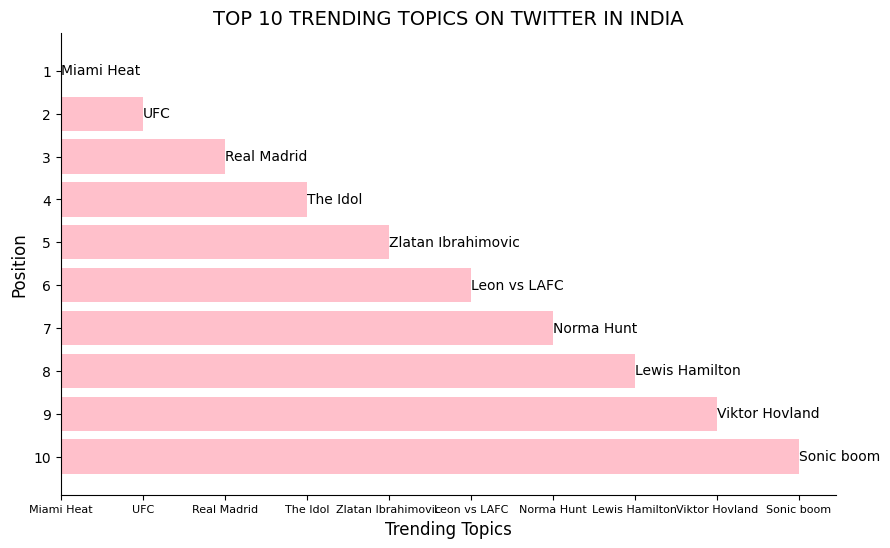

In [65]:
# Sorting the DataFrame by position
df = df.sort_values('position', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['position'], df['trends'], align='center', color='pink')
plt.xlabel('Trending Topics', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.title('TOP 10 TRENDING TOPICS ON TWITTER IN INDIA', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(df['position'], fontsize=10)
plt.gca().invert_yaxis()

# Adding data labels
for i, v in enumerate(df['trends']):
    plt.text(v, df['position'][i], str(v), color='black', fontsize=10, va='center')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Displaying the chart
plt.show()